In [28]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [29]:
import yfinance as yf

symbol = "AUDNZD=X"
start_date = "2010-01-01"
end_date = "2023-08-05"
data = yf.download(symbol, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,1.241700,1.241800,1.2349,1.236200,1.236200,0
2010-01-04,1.238900,1.245900,1.2389,1.242000,1.242000,0
2010-01-05,1.241800,1.245700,1.2395,1.241800,1.241800,0
2010-01-06,1.241700,1.250000,1.2417,1.246100,1.246100,0
2010-01-07,1.245400,1.253200,1.2449,1.252200,1.252200,0
...,...,...,...,...,...,...
2023-06-13,1.101790,1.104660,1.1009,1.101790,1.101790,0
2023-06-14,1.098920,1.101410,1.0948,1.098920,1.098920,0
2023-06-15,1.096770,1.103841,1.0950,1.096770,1.096770,0


<Axes: xlabel='Date'>

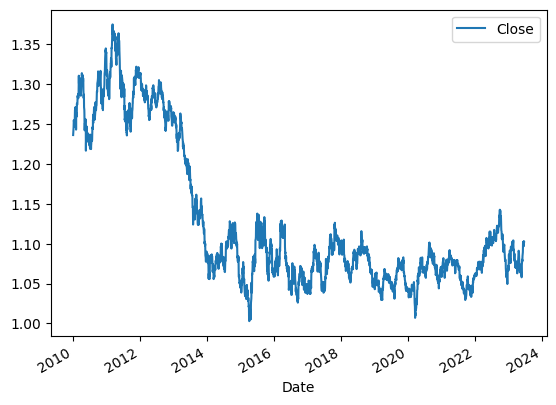

In [30]:
data.plot.line(y="Close", use_index=True)

In [31]:
del data["Volume"]
data

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-01-01,1.241700,1.241800,1.2349,1.236200,1.236200
2010-01-04,1.238900,1.245900,1.2389,1.242000,1.242000
2010-01-05,1.241800,1.245700,1.2395,1.241800,1.241800
2010-01-06,1.241700,1.250000,1.2417,1.246100,1.246100
2010-01-07,1.245400,1.253200,1.2449,1.252200,1.252200
...,...,...,...,...,...
2023-06-13,1.101790,1.104660,1.1009,1.101790,1.101790
2023-06-14,1.098920,1.101410,1.0948,1.098920,1.098920
2023-06-15,1.096770,1.103841,1.0950,1.096770,1.096770


In [32]:
data["Tomorrow"] = data["Close"].shift(-1)
data["Target"] = (data["Tomorrow"] > data["Close"]).astype(int)
data

,Open,High,Low,Close,Adj Close,Tomorrow,Target
Date,,,,,,,
2010-01-01,1.241700,1.241800,1.2349,1.236200,1.236200,1.242000,1
2010-01-04,1.238900,1.245900,1.2389,1.242000,1.242000,1.241800,0
2010-01-05,1.241800,1.245700,1.2395,1.241800,1.241800,1.246100,1
2010-01-06,1.241700,1.250000,1.2417,1.246100,1.246100,1.252200,1
2010-01-07,1.245400,1.253200,1.2449,1.252200,1.252200,1.254700,1
...,...,...,...,...,...,...,...
2023-06-13,1.101790,1.104660,1.1009,1.101790,1.101790,1.098920,0
2023-06-14,1.098920,1.101410,1.0948,1.098920,1.098920,1.096770,0
2023-06-15,1.096770,1.103841,1.0950,1.096770,1.096770,1.103336,1


In [33]:
X = data.drop('Target', axis=1)
y = data['Target']

X, y

(                Open      High     Low     Close  Adj Close  Tomorrow
 Date                                                                 
 2010-01-01  1.241700  1.241800  1.2349  1.236200   1.236200  1.242000
 2010-01-04  1.238900  1.245900  1.2389  1.242000   1.242000  1.241800
 2010-01-05  1.241800  1.245700  1.2395  1.241800   1.241800  1.246100
 2010-01-06  1.241700  1.250000  1.2417  1.246100   1.246100  1.252200
 2010-01-07  1.245400  1.253200  1.2449  1.252200   1.252200  1.254700
 ...              ...       ...     ...       ...        ...       ...
 2023-06-13  1.101790  1.104660  1.1009  1.101790   1.101790  1.098920
 2023-06-14  1.098920  1.101410  1.0948  1.098920   1.098920  1.096770
 2023-06-15  1.096770  1.103841  1.0950  1.096770   1.096770  1.103336
 2023-06-16  1.103336  1.104990  1.1013  1.103336   1.103336  1.102600
 2023-06-19  1.102600  1.105010  1.1003  1.102600   1.102600       NaN
 
 [3510 rows x 6 columns],
 Date
 2010-01-01    1
 2010-01-04    0
 2010-01-

In [34]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

predictors = ["Open","High","Low","Close"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [35]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.8125

<Axes: xlabel='Date'>

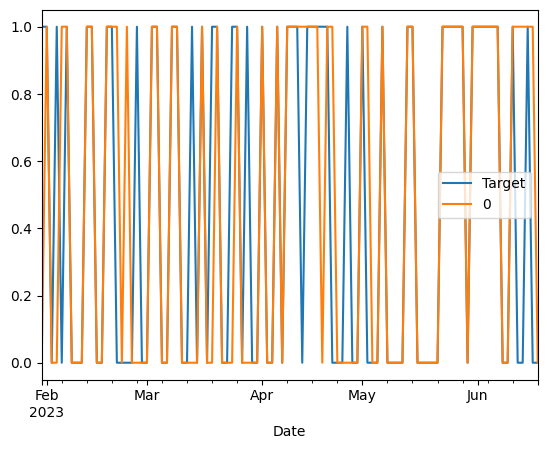

In [36]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [37]:
combined

,Target,0
Date,,
2023-01-31,1,0
2023-02-01,1,1
2023-02-02,0,0
2023-02-03,1,0
2023-02-06,0,1
...,...,...
2023-06-13,0,1
2023-06-14,0,1
2023-06-15,1,1


In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
def backtest(data, model, predictors, start=300, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [40]:
predictions = backtest(data, model, predictors)

In [41]:
predictions["Predictions"].value_counts()

Predictions
0    1895
1    1315
Name: count, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6448669201520912

In [43]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
0    0.520249
1    0.479751
Name: count, dtype: float64

<Axes: xlabel='Date'>

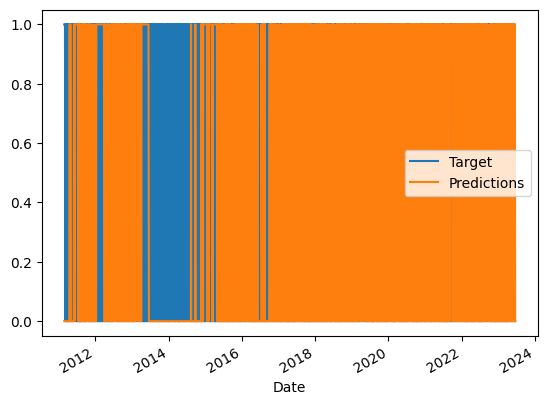

In [44]:
combined2 = pd.concat([predictions["Target"], predictions["Predictions"]], axis=1)
combined2.plot()

In [45]:
predictions

,Target,Predictions
Date,,
2011-02-25,1,0
2011-02-28,1,0
2011-03-01,1,0
2011-03-02,1,0
2011-03-03,1,0
...,...,...
2023-06-13,0,1
2023-06-14,0,1
2023-06-15,1,1


In [46]:
#features = [Open,High,Low,Close]
import numpy as np

new_df = np.array([[1.0990, 1.1001, 1.0981, 1.0990]])
new_predictions = model.predict(new_df)
print(new_predictions)

if(new_predictions[0] ==0 ):
    print('Prediksi Turun')
else :
    print('Prediksi Naik')

[1]
Prediksi Naik


c:\Users\uSeR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
import pickle

In [48]:
filename = 'audnzdmodel.sav'
pickle.dump(model, open(filename,'wb'))